In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Javascript
import getpass

In [2]:
password = None
if password is None:
    password = getpass.getpass()

In [4]:
!echo $password | sudo -S mount -t tmpfs -o size=20g tmpfs /mnt/tmpfs/
!cp -r ~/Documents/distros /mnt/tmpfs/

[sudo] password for fbdtemme: 

In [39]:
pwd = "/mnt/tmpfs"
max_threads = 4
iterations = 5
target = 'distros'

In [4]:
fs = !du -b $pwd/$target | grep -o "[0-9]*"
file_size = int(fs[0])

In [5]:
file_size

14434222180

In [6]:
# Disable cpu frequency scaling
!echo $password | sudo -S cpupower frequency-set -g performance

[sudo] password for fbdtemme: Setting cpu: 0
Setting cpu: 1
Setting cpu: 2
Setting cpu: 3
Setting cpu: 4
Setting cpu: 5
Setting cpu: 6
Setting cpu: 7


In [40]:
def parse_real_time(data: str):
    results = []
    match = re.search(R"real\s(\d+)m([\d.]+)s", data)
    minutes = float(match.group(1))
    seconds = float(match.group(2))
    return minutes * 60 + seconds

def parse_real_time_sequence(data: str):
    results = []
    for match in re.findall(R"real\s(\d+)m([\d.]+)s", data):
        print(match[0])
        print(match[1])
        minutes = float(match[0])
        seconds = float(match[1])
        results.append(minutes * 60 + seconds)
    return results

In [41]:
data = {}

In [42]:
def run_benchmark(name: str, use_threads:bool = True):
    duration = np.ndarray(shape=(iterations, max_threads))
    
    if use_threads:
        for t in range(1, max_threads+1):
            for i in range(0, iterations):
                result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
                result_str = '\n'.join(result)
                print(f"-- iteration {i+1} | threads {t}\n{result_str}")
                duration[i, t-1] = parse_real_time(result_str)
    else:
        for i in range(0, iterations):
            t = 1
            result = !./benchmark.sh "{name}" "{pwd}" "{target}" "{t}"
            result_str = '\n'.join(result)
            print(f"-- iteration {i+1} | threads {t}\n{result_str}")
            duration[i, :] = parse_real_time(result_str)

    speed = file_size / duration
    mean = np.mean(speed, axis=0)
    std  = np.std(speed, axis=0)
    return (mean, std)

### mktorrent

In [43]:
mktorrent_data = run_benchmark("mktorrent")

-- iteration 1 | threads 1

real	0m18.258s
user	0m18.149s
sys	0m5.469s

-- iteration 2 | threads 1

real	0m19.784s
user	0m19.151s
sys	0m6.446s

-- iteration 3 | threads 1

real	0m19.736s
user	0m19.170s
sys	0m6.412s

-- iteration 4 | threads 1

real	0m20.878s
user	0m20.139s
sys	0m7.401s

-- iteration 5 | threads 1

real	0m19.563s
user	0m18.963s
sys	0m5.997s

-- iteration 1 | threads 2

real	0m11.258s
user	0m21.526s
sys	0m7.444s

-- iteration 2 | threads 2

real	0m10.197s
user	0m19.878s
sys	0m6.667s

-- iteration 3 | threads 2

real	0m10.622s
user	0m20.521s
sys	0m7.041s

-- iteration 4 | threads 2

real	0m12.281s
user	0m23.413s
sys	0m8.257s

-- iteration 5 | threads 2

real	0m11.529s
user	0m22.267s
sys	0m8.241s

-- iteration 1 | threads 3

real	0m9.695s
user	0m25.930s
sys	0m8.214s

-- iteration 2 | threads 3

real	0m7.553s
user	0m21.716s
sys	0m6.063s

-- iteration 3 | threads 3

real	0m8.227s
user	0m23.176s
sys	0m6.608s

-- iteration 4 | threads 3

real	0m8.056s
user	0m23.351s
sys	0m6.29

In [44]:
torrenttools_openssl_data = run_benchmark("torrenttools_openssl")

-- iteration 1 | threads 1

real	0m22.020s
user	0m21.183s
sys	0m7.171s

-- iteration 2 | threads 1

real	0m20.021s
user	0m19.698s
sys	0m6.253s

-- iteration 3 | threads 1

real	0m21.023s
user	0m19.928s
sys	0m6.336s

-- iteration 4 | threads 1

real	0m22.026s
user	0m20.934s
sys	0m7.005s

-- iteration 5 | threads 1

real	0m20.021s
user	0m19.863s
sys	0m6.384s

-- iteration 1 | threads 2

real	0m11.020s
user	0m20.396s
sys	0m6.154s

-- iteration 2 | threads 2

real	0m12.022s
user	0m21.661s
sys	0m7.071s

-- iteration 3 | threads 2

real	0m12.021s
user	0m21.824s
sys	0m7.114s

-- iteration 4 | threads 2

real	0m12.021s
user	0m21.987s
sys	0m7.118s

-- iteration 5 | threads 2

real	0m11.023s
user	0m21.243s
sys	0m6.869s

-- iteration 1 | threads 3

real	0m8.022s
user	0m21.112s
sys	0m5.896s

-- iteration 2 | threads 3

real	0m8.023s
user	0m22.805s
sys	0m5.935s

-- iteration 3 | threads 3

real	0m8.037s
user	0m23.184s
sys	0m6.827s

-- iteration 4 | threads 3

real	0m9.037s
user	0m24.933s
sys	0m7.02

In [14]:
torrenttools_isal_data = run_benchmark("torrenttools_isal")

-- iteration 1 | threads 1

real	0m8.027s
user	0m7.814s
sys	0m4.581s

-- iteration 2 | threads 1

real	0m9.022s
user	0m8.293s
sys	0m4.628s

-- iteration 3 | threads 1

real	0m9.022s
user	0m8.195s
sys	0m4.610s

-- iteration 1 | threads 2

real	0m6.028s
user	0m9.971s
sys	0m5.292s

-- iteration 2 | threads 2

real	0m6.030s
user	0m9.874s
sys	0m5.289s

-- iteration 3 | threads 2

real	0m6.026s
user	0m10.201s
sys	0m5.317s

-- iteration 1 | threads 3

real	0m4.021s
user	0m7.473s
sys	0m3.088s

-- iteration 2 | threads 3

real	0m4.023s
user	0m7.482s
sys	0m3.162s

-- iteration 3 | threads 3

real	0m4.039s
user	0m7.540s
sys	0m2.961s

-- iteration 1 | threads 4

real	0m4.033s
user	0m8.099s
sys	0m3.209s

-- iteration 2 | threads 4

real	0m4.033s
user	0m8.470s
sys	0m3.235s

-- iteration 3 | threads 4

real	0m4.021s
user	0m7.961s
sys	0m2.988s



In [15]:
imdl_data = run_benchmark("imdl", use_threads=False)

-- iteration 1 | threads 1

real	0m35.531s
user	0m31.144s
sys	0m3.809s

-- iteration 2 | threads 1

real	0m33.929s
user	0m30.151s
sys	0m3.352s

-- iteration 3 | threads 1

real	0m38.133s
user	0m32.934s
sys	0m4.309s



In [16]:
dottorrent_cli_data = run_benchmark("dottorrent-cli", use_threads=False)

-- iteration 1 | threads 1

real	0m41.599s
user	0m28.014s
sys	0m12.727s

-- iteration 2 | threads 1

real	0m34.334s
user	0m23.900s
sys	0m9.960s

-- iteration 3 | threads 1

real	0m39.360s
user	0m26.765s
sys	0m11.534s



In [17]:
pyrocore_data = run_benchmark("pyrocore", use_threads=False)

-- iteration 1 | threads 1

real	0m27.118s
user	0m20.257s
sys	0m5.801s

-- iteration 2 | threads 1

real	0m23.364s
user	0m17.955s
sys	0m4.964s

-- iteration 3 | threads 1

real	0m22.166s
user	0m17.528s
sys	0m4.261s



In [18]:
transmission_create_data = run_benchmark("transmission-create", use_threads=False)

-- iteration 1 | threads 1

real	0m20.023s
user	0m16.511s
sys	0m3.106s

-- iteration 2 | threads 1

real	0m22.507s
user	0m17.540s
sys	0m4.121s

-- iteration 3 | threads 1

real	0m24.507s
user	0m18.943s
sys	0m5.046s



In [19]:
py3createtorrent_data = run_benchmark("py3createtorrent", use_threads=False)

-- iteration 1 | threads 1

real	0m33.287s
user	0m25.500s
sys	0m7.223s

-- iteration 2 | threads 1

real	0m31.464s
user	0m24.048s
sys	0m6.558s

-- iteration 3 | threads 1

real	0m24.069s
user	0m19.570s
sys	0m4.104s



In [20]:
torf_data = run_benchmark("torf-cli")

-- iteration 1 | threads 1

real	0m18.282s
user	0m17.132s
sys	0m8.050s

-- iteration 2 | threads 1

real	0m19.933s
user	0m18.403s
sys	0m10.442s

-- iteration 3 | threads 1

real	0m20.432s
user	0m18.760s
sys	0m11.240s

-- iteration 1 | threads 2

real	0m12.173s
user	0m19.042s
sys	0m11.162s

-- iteration 2 | threads 2

real	0m12.814s
user	0m19.542s
sys	0m11.720s

-- iteration 3 | threads 2

real	0m12.202s
user	0m19.015s
sys	0m11.269s

-- iteration 1 | threads 3

real	0m11.993s
user	0m19.254s
sys	0m11.028s

-- iteration 2 | threads 3

real	0m12.186s
user	0m20.529s
sys	0m11.376s

-- iteration 3 | threads 3

real	0m11.993s
user	0m19.559s
sys	0m11.144s

-- iteration 1 | threads 4

real	0m12.118s
user	0m19.434s
sys	0m11.199s

-- iteration 2 | threads 4

real	0m11.946s
user	0m19.397s
sys	0m11.042s

-- iteration 3 | threads 4

real	0m11.760s
user	0m19.191s
sys	0m10.907s



In [45]:
benchmark_data = {
    "mktorrent": mktorrent_data, 
    "imdl": imdl_data,
    "dottorrent-cli": dottorrent_cli_data,
    "pyrocore": pyrocore_data,
    "transmission-create": transmission_create_data,
    "py3createtorrent" : py3createtorrent_data,
    "torf-cli": torf_data,
    "torrenttools (OpenSSL)": torrenttools_openssl_data,
    "torrenttools (ISA-L)": torrenttools_isal_data,
}

In [46]:
programs = list(benchmark_data.keys())
threads = list(range(1, max_threads+1))
index = pd.MultiIndex.from_product((threads, programs), names=["threads", "programs"])

speed_mean_data = {}
speed_stddev_data = {}
for program, data in benchmark_data.items():
    speed_mean_data[program] = data[0]
    speed_stddev_data[program] = data[1]
    

speed_mean = pd.DataFrame(speed_mean_data).stack()
speed_stddev = pd.DataFrame(speed_stddev_data).stack()

In [47]:
df = pd.DataFrame()
df["speed_mean"], df["speed_stddev"] = speed_mean / 1e6, speed_stddev / 1e6
df.index = index

In [48]:
df.to_csv("benchmark.csv")
df

speed_mean  speed_stddev
threads programs                                         
1       mktorrent                736.143739     31.737573
        imdl                     403.396838     19.252820
        dottorrent-cli           378.038012     31.023535
        pyrocore                 600.419882     50.076996
        transmission-create      650.395734     54.228265
        py3createtorrent         497.361586     73.088725
        torf-cli                 740.040206     35.732921
        torrenttools (OpenSSL)   687.866354     29.316596
        torrenttools (ISA-L)    1665.997351     93.487624
2       mktorrent               1296.777442     83.585289
        imdl                     403.396838     19.252820
        dottorrent-cli           378.038012     31.023535
        pyrocore                 600.419882     50.076996
        transmission-create      650.395734     54.228265
        py3createtorrent         497.361586     73.088725
        torf-cli                1165.045929     27.321643
        torrenttools (OpenSSL)  1244.287259     53.362287
        torrenttools (ISA-L)    2394.529403      0.648681
3       mktorrent               1736.701536    137.975024
        imdl                     403.396838     19.252820
        dottorrent-cli           378.038012     31.023535
        pyrocore                 600.419882     50.076996
        transmission-create      650.395734     54.228265
        py3createtorrent         497.361586     73.088725
        torf-cli                1197.200021      8.985773
        torrenttools (OpenSSL)  1757.880661     80.331213
        torrenttools (ISA-L)    3583.782134      7.157937
4       mktorrent               1891.022521    109.467172
        imdl                     403.396838     19.252820
        dottorrent-cli           378.038012     31.023535
        pyrocore                 600.419882     50.076996
        transmission-create      650.395734     54.228265
        py3createtorrent         497.361586     73.088725
        torf-cli                1208.942659     14.810646
        torrenttools (OpenSSL)  2053.291111      1.035780
        torrenttools (ISA-L)    3582.588896      5.035077

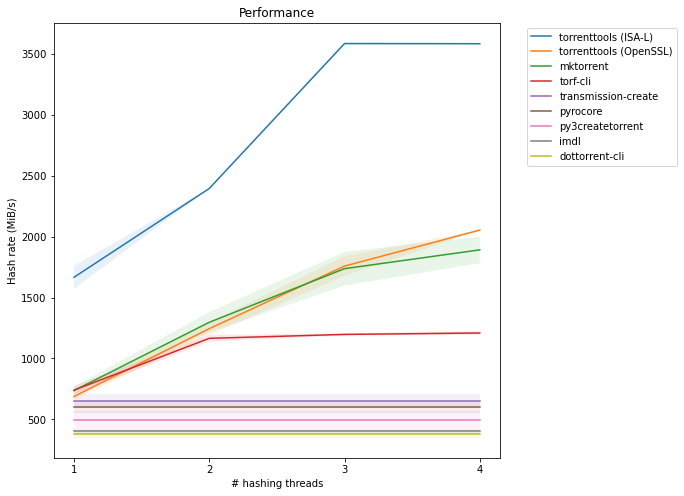

In [49]:
import matplotlib.cm
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

programs = df.index.unique(level=1)
threads = df.index.unique(level=0)
programs_by_max_speed = {}

for program in programs:
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    programs_by_max_speed[program] = np.max(sm)

sorted_programs = sorted(programs_by_max_speed.keys(), key=lambda x : programs_by_max_speed[x], reverse=True)

for idx, program in enumerate(sorted_programs):
    sm = df.loc[df.index.get_level_values(1) == program, "speed_mean"]
    sd = df.loc[df.index.get_level_values(1) == program, "speed_stddev"]
    ax.plot(threads, sm)
    ax.fill_between(threads, sm - sd, sm + sd, alpha=0.1)

ax.set_title("Performance")
ax.set_xlabel("# hashing threads")
ax.set_ylabel("Hash rate (MiB/s)")
ax.set_xticks(list(range(1, max_threads+1)))
ax.legend(sorted_programs, bbox_to_anchor=(1.05, 1), loc='upper left')